# Hyperparameter tuning and cross validation

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the cars 93 dataset

In [2]:
import os
os.chdir('E:/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('Cars93.csv')
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

### Check missing values

In [5]:
s = df.isna().sum()
s

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [6]:
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

### Check duplicates

In [7]:
df.duplicated().sum()

0

### Seperating X and Y(Weight)
Weight ~ Remaining features

In [8]:
X = df.drop(columns=['Weight', 'id'])
Y = df[['Weight']]

In [9]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [10]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Perform catconsep on X

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [13]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

### Preprocessing Pipeline for X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [17]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  0.        ,
         0.        ,  1.        ]])

In [18]:
cols = pre.get_feature_names_out()
cols

array(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower',
       'num__RPM', 'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       'num__Passengers', 'num__Length', 'num__Wheelbase', 'num__Width',
       'num__Turn.circle', 'num__Rear.seat.room', 'num__Luggage.room',
       'cat__Manufacturer_Acura', 'cat__Manufacturer_Audi',
       'cat__Manufacturer_BMW', 'cat__Manufacturer_Buick',
       'cat__Manufacturer_Cadillac', 'cat__Manufacturer_Chevrolet',
       'cat__Manufacturer_Chrylser', 'cat__Manufacturer_Chrysler',
       'cat__Manufacturer_Dodge', 'cat__Manufacturer_Eagle',
       'cat__Manufacturer_Ford', 'cat__Manufacturer_Geo',
       'cat__Manufacturer_Honda', 'cat__Manufacturer_Hyundai',
       'cat__Manufacturer_Infiniti', 'cat__Manufacturer_Lexus',
       'cat__Manufacturer_Lincoln', 'cat__Manufacturer_Mazda',
       'cat__Manufacturer_Mercedes-Benz', 'cat__Manufacturer_Mercury',
       'cat__Man

In [19]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Apply train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=10)

In [22]:
xtrain.shape

(74, 257)

In [23]:
xtest.shape

(19, 257)

### Create a base linear regression model

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [24]:
model.score(xtrain, ytrain)

1.0

In [25]:
model.score(xtest, ytest)

0.8352083708149685

In [26]:
from PM6func import evaluate_model
evaluate_model(xtrain, ytrain, xtest, ytest, model)

Training Results : 
MSE : 0.00
RMSE: 0.00
MAE : 0.00
R2  : 1.0000


Testing Results : 
MSE : 38286.85
RMSE: 195.67
MAE : 148.94
R2  : 0.8352


### Cross Validation (Instead of 2 splits train and test divide data in multiple parts)

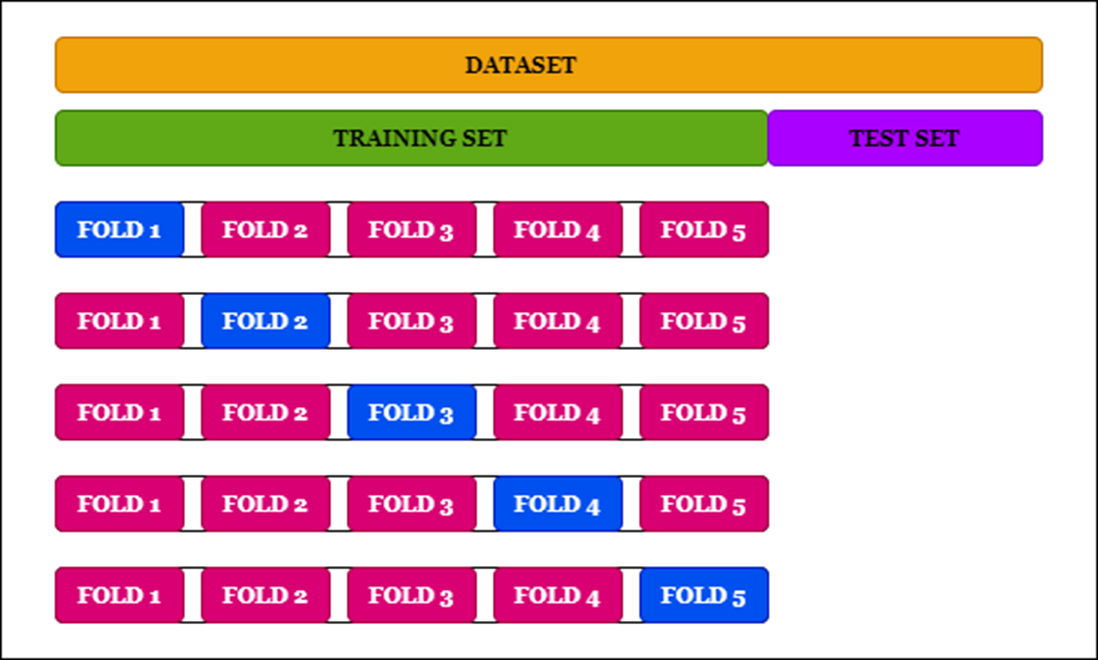

In [27]:
from sklearn.model_selection import cross_val_score

In [31]:
r2_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='r2')
r2_scores

array([0.97433582, 0.96596894, 0.87051724, 0.95547793, 0.93691016])

In [33]:
r2_cv = r2_scores.mean()
r2_cv

0.9406420197371205

### MSE cross validated

In [34]:
mse_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
mse_scores

array([ -9334.42056266, -15624.36131495, -41909.54211067, -19144.17195082,
       -16772.14373193])

In [36]:
mse_cv = -mse_scores.mean()
mse_cv

20556.92793420511

### RMSE CV

In [37]:
rmse_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores

array([ -96.61480509, -124.99744523, -204.71820171, -138.36246583,
       -129.5073115 ])

In [39]:
rmse_cv = -rmse_scores.mean()
rmse_cv

138.8400458726406

### MAE Cross validated

In [41]:
mae_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
mae_scores

array([ -77.54534696,  -96.24053837, -166.19754923, -102.14153737,
        -98.95820122])

In [43]:
mae_cv = -mae_scores.mean()
mae_cv

108.21663462901779

### Hyperparameter tuning

In [49]:
import numpy as np

In [51]:
params = {'alpha':np.arange(0.1, 100, 0.1)}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [53]:
rr = Ridge()
gscv = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [54]:
gscv.best_params_

{'alpha': 3.7}

In [55]:
gscv.best_score_

-19677.67905427544

In [56]:
best_ridge = gscv.best_estimator_
best_ridge

Ridge(alpha=3.7)

In [57]:
best_ridge.score(xtrain, ytrain)

0.990880671985162

In [59]:
best_ridge.score(xtest, ytest)

0.8790151733876548

In [61]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_ridge)

Training Results : 
MSE : 3391.62
RMSE: 58.24
MAE : 43.78
R2  : 0.9909


Testing Results : 
MSE : 28109.00
RMSE: 167.66
MAE : 130.49
R2  : 0.8790


In [63]:
r2_scores = cross_val_score(best_ridge, xtrain, ytrain, cv=5, scoring='r2')
r2_scores

array([0.97368748, 0.9682849 , 0.88988951, 0.95044563, 0.93488797])

In [64]:
r2_scores.mean()

0.9434390955090677

### Lasso Hyperparameter tuning

In [65]:
from sklearn.linear_model import Lasso

In [66]:
ls = Lasso()
gscv2 = GridSearchCV(ls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [67]:
gscv2.best_params_

{'alpha': 5.2}

In [68]:
gscv2.best_score_

-19946.502632520143

In [70]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=5.2)

In [71]:
best_lasso.score(xtrain, ytrain)

0.9714666534740786

In [72]:
best_lasso.score(xtest, ytest)

0.869457987545957

In [73]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_lasso)

Training Results : 
MSE : 10611.98
RMSE: 103.01
MAE : 81.72
R2  : 0.9715


Testing Results : 
MSE : 30329.47
RMSE: 174.15
MAE : 131.92
R2  : 0.8695


In [74]:
r2_scores2 = cross_val_score(best_lasso, xtrain, ytrain, cv=5, scoring='r2')
r2_scores2.mean()

0.9422784524364886

### Selecting ridge model because of highest test r2 score

### Make use of ridge for final predictions

In [75]:
ypred_tr = best_ridge.predict(xtrain)
ypred_ts = best_ridge.predict(xtest)

In [76]:
ypred_tr[0:5]

array([[3023.99705509],
       [2473.33916602],
       [3507.729358  ],
       [3529.40385883],
       [3081.9415105 ]])

In [77]:
ytrain.head()

,Weight
42,3040
53,2440
21,3570
6,3470
26,3080


In [78]:
ypred_ts[0:5]

array([[2905.19511174],
       [3147.90316043],
       [3590.38208996],
       [3995.32035232],
       [3483.68158777]])

In [79]:
ytest.head()

,Weight
34,2710
90,2810
3,3405
35,3735
19,3515


### Predicting out of sample values

In [80]:
xnew = pd.read_csv('sample.csv')
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


### Apply pre.transform on out of sample data

In [82]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

array([[ 1.57194871,  1.89337432,  2.06919057, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88813804, -0.87533727, -0.829362  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42830874, -0.37572014, -0.31892507, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.76737617,  1.35212243,  0.9662822 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.96860817, -1.08351107, -1.1301552 , ...,  0.        ,
         0.        ,  0.        ]])

In [83]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [84]:
preds = best_ridge.predict(xnew_pre)
preds

array([[3524.7622428 ],
       [2651.72636154],
       [3056.52566348],
       [3270.15239209],
       [2242.24388529]])

### Save predictions in dataframe

In [85]:
xnew['Weight_pred'] = preds

In [86]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,193,106,65,37,31.0,17.0,non-USA,Audi 100,3524.762243
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2651.726362
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3056.525663
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,3270.152392
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2242.243885


### Save the file to CSV

In [87]:
xnew.to_csv('TuningResults.csv', index=False)

### Categorical Pipeline

In [88]:
cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])